In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [73]:
df = df.drop(columns=["User ID"])
df = pd.get_dummies(df, columns=["Gender"])
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


<Axes: >

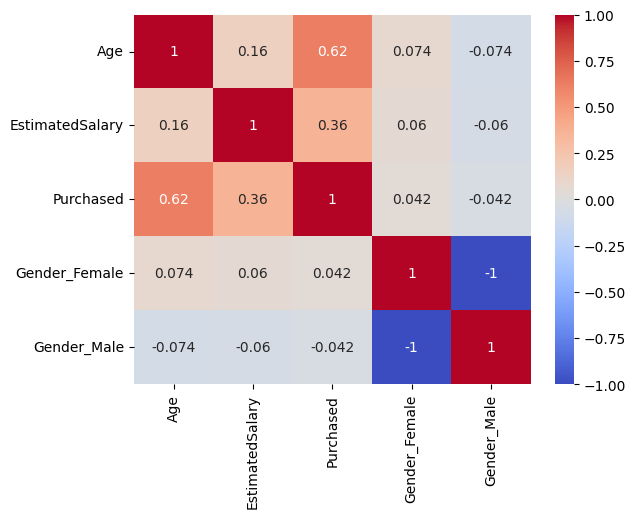

In [74]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [75]:
df = df.drop(columns=["Gender_Male", "Gender_Female"])
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Axes: >

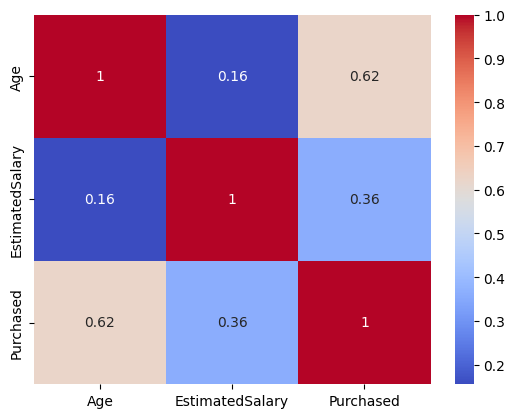

In [76]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

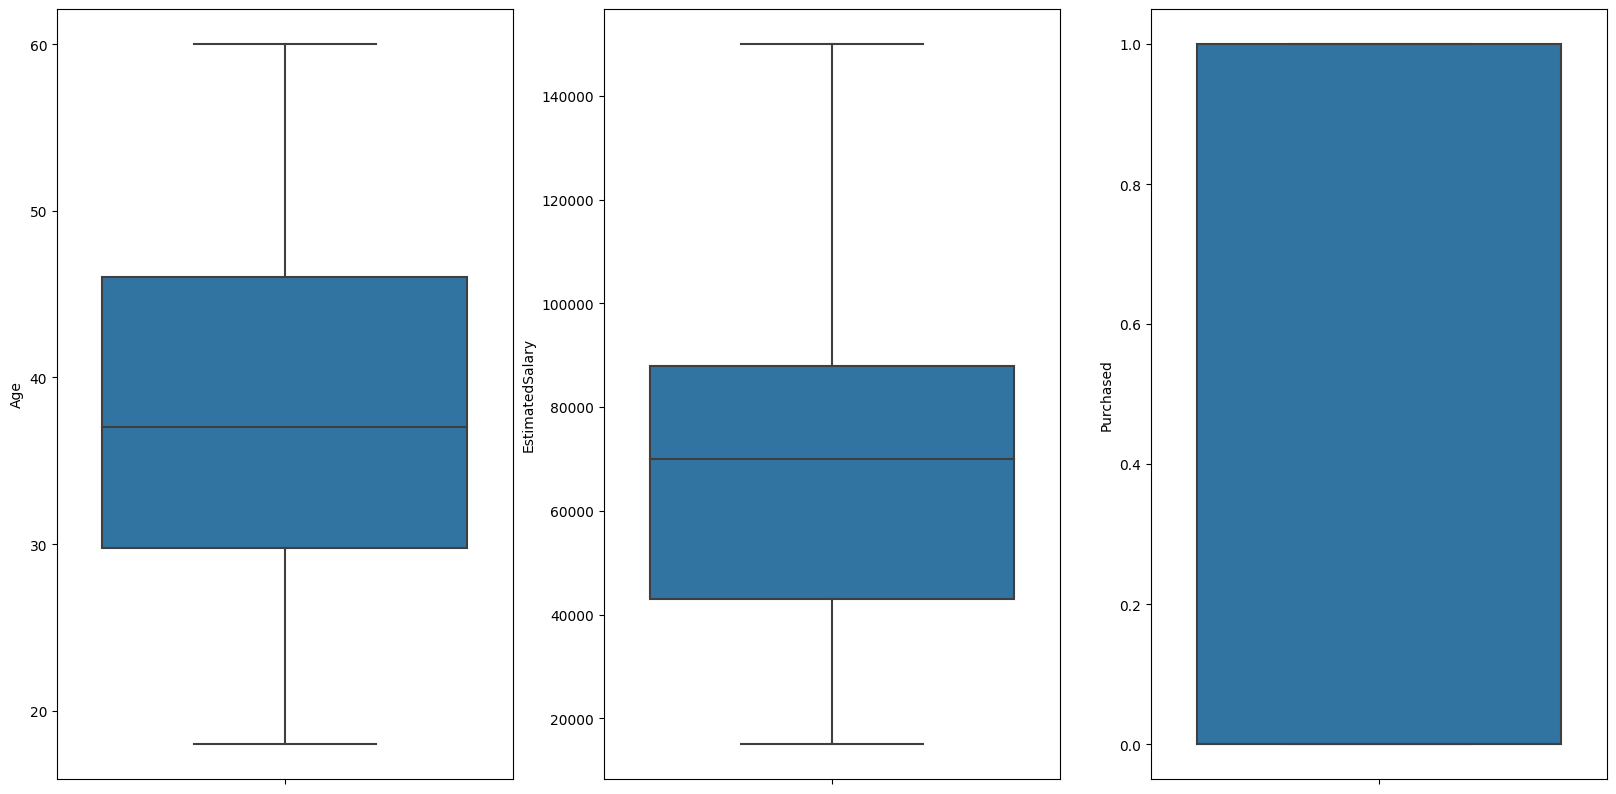

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
index = 0
for col,values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

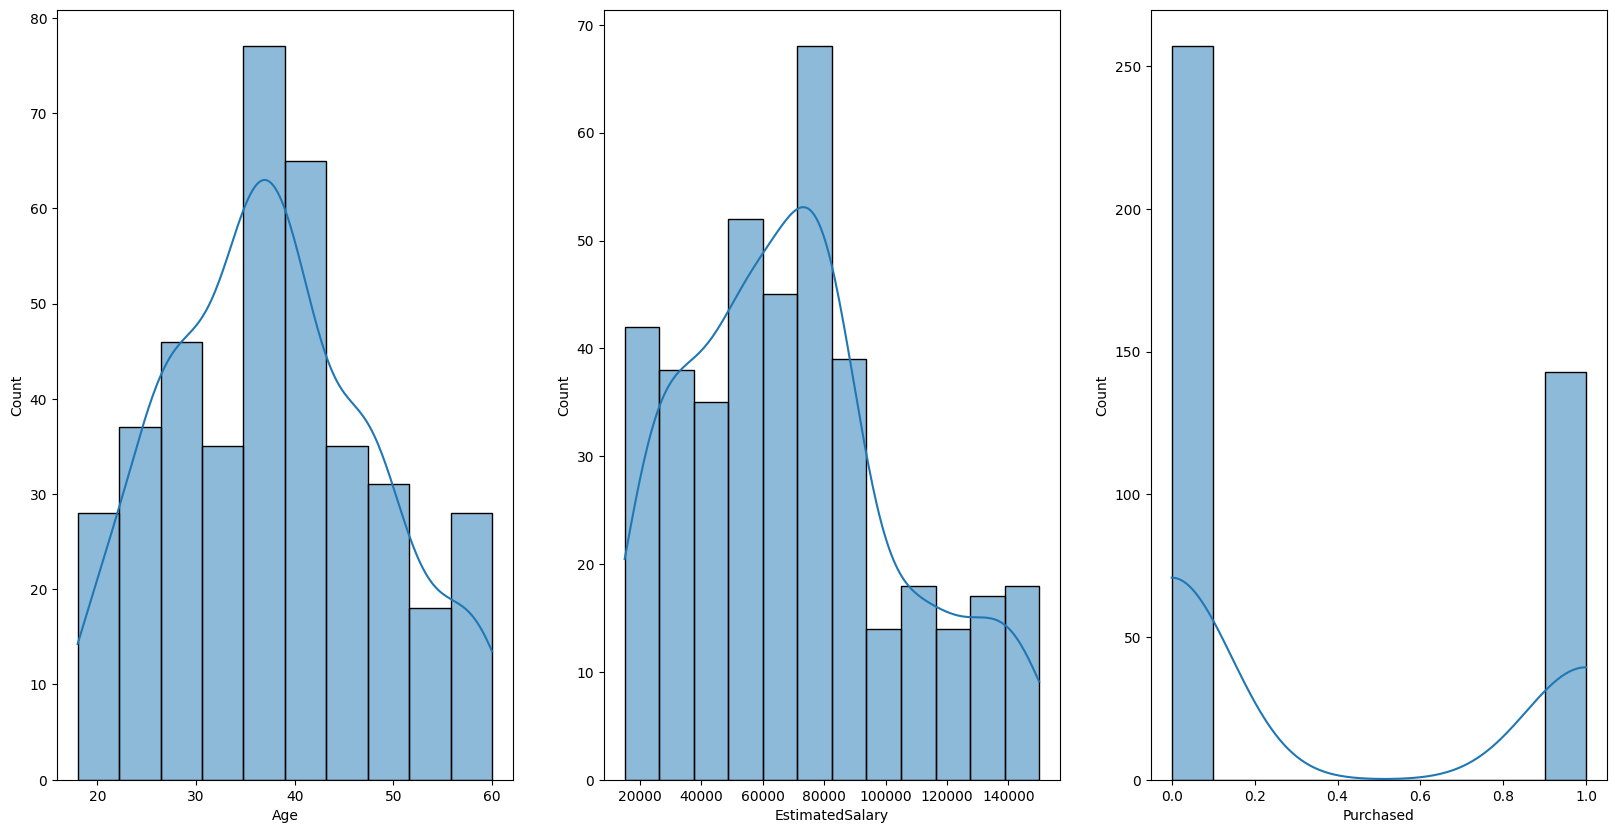

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
index = 0
for col,values in df.items():
    sns.histplot(values, ax=ax[index], kde=True)
    index += 1

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def train(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    pred_df = pd.DataFrame({"Actual": y_test, "Pred": y_pred})
    print(pred_df)
    
    # ACCURACY
    train_score = model.score(x_train,y_train)*100
    test_score = model.score(x_test,y_test)*100
    cr = classification_report(y_test, y_pred)
    
    print("\nACCURACY")
    print("Training accuracy:", train_score)
    print("Testing accuracy:", test_score)
    print("classification report:\n", cr)
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

     Actual  Pred
209       0     0
280       1     0
33        0     0
210       1     0
93        0     0
..      ...   ...
332       0     0
167       0     0
245       1     0
311       1     0
145       0     0

[132 rows x 2 columns]

ACCURACY
Training accuracy: 66.04477611940298
Testing accuracy: 60.60606060606061
classification report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.75        80
           1       0.00      0.00      0.00        52

    accuracy                           0.61       132
   macro avg       0.30      0.50      0.38       132
weighted avg       0.37      0.61      0.46       132



C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


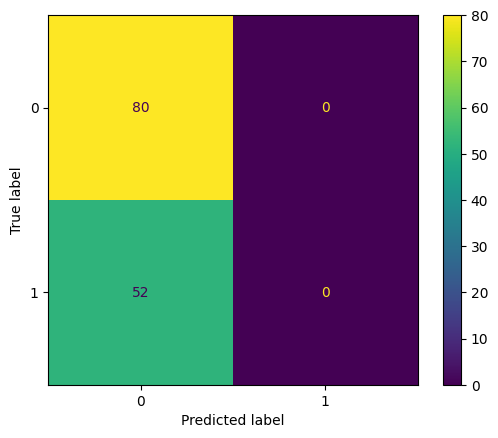

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df.drop(columns=["Purchased"])
Y = df["Purchased"]
train(model, X, Y)

In [81]:
cols = ["Age", "EstimatedSalary"]
for col in cols:
    mn = df[col].min()
    mx = df[col].max()
    df[col] = (df[col]-mn) / (mx-mn)
    
df

,Age,EstimatedSalary,Purchased
0,0.023810,0.029630,0
1,0.404762,0.037037,0
2,0.190476,0.207407,0
3,0.214286,0.311111,0
4,0.023810,0.451852,0
...,...,...,...
395,0.666667,0.192593,1
396,0.785714,0.059259,1
397,0.761905,0.037037,1
398,0.428571,0.133333,0


     Actual  Pred
209       0     0
280       1     1
33        0     0
210       1     1
93        0     0
..      ...   ...
332       0     0
167       0     0
245       1     1
311       1     0
145       0     0

[132 rows x 2 columns]

ACCURACY
Training accuracy: 81.71641791044776
Testing accuracy: 82.57575757575758
classification report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.97      0.58      0.72        52

    accuracy                           0.83       132
   macro avg       0.87      0.78      0.80       132
weighted avg       0.86      0.83      0.81       132



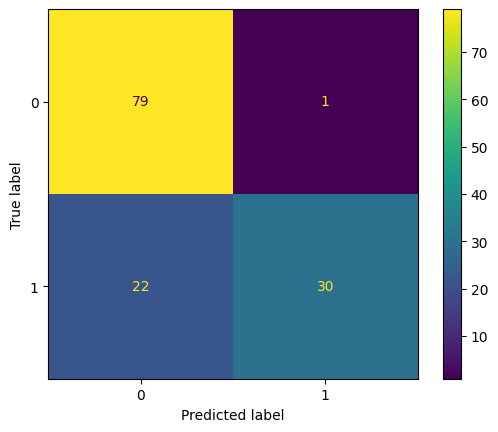

In [82]:
X = df.drop(columns=["Purchased"])
Y = df["Purchased"]
train(model, X, Y)